<a href="https://colab.research.google.com/github/pradee1/Tensorflow_deeplearning.ai/blob/master/Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [0]:
def get_data(filename):
  
  data = pd.read_csv(filename)
  labels  = np.array(data['label'])
  images = np.array(data.drop(['label'], axis = 1))
  x,y = images.shape
  y = int(np.sqrt(y))
  images = images.reshape((x,y,y))
  
  return images, labels


In [0]:
def get_data(filename):
  
  data = pd.read_csv(filename)
  labels  = np.array(data['label'])
  images = np.array(data.drop(['label'], axis = 1))
  x,y = images.shape
  y = int(np.sqrt(y))
  images = images.reshape((x,y,y))
  
  return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    zoom_range = 0.2,
    shear_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rotation_range = 40,
    fill_mode = 'nearest',
    horizontal_flip = True
    )

validation_datagen = ImageDataGenerator(
     rescale = 1/255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])


# Compile Model. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'] )

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/15
858/857 [==============================] - 14s 16ms/step - loss: 2.8505 - acc: 0.1398 - val_loss: 2.0511 - val_acc: 0.3264
Epoch 2/15
858/857 [==============================] - 10s 12ms/step - loss: 2.1272 - acc: 0.3309 - val_loss: 1.5478 - val_acc: 0.4745
Epoch 3/15
858/857 [==============================] - 10s 12ms/step - loss: 1.7257 - acc: 0.4479 - val_loss: 1.2227 - val_acc: 0.5933
Epoch 4/15
858/857 [==============================] - 10s 12ms/step - loss: 1.4785 - acc: 0.5236 - val_loss: 0.9119 - val_acc: 0.6963
Epoch 5/15
858/857 [==============================] - 10s 12ms/step - loss: 1.2976 - acc: 0.5765 - val_loss: 0.8170 - val_acc: 0.7143
Epoch 6/15
858/857 [==============================] - 10s 12ms/step - loss: 1.1788 - acc: 0.6149 - val_loss: 0.6498 - val_acc: 0.7729
Epoch 7/15
858/857 [==============================] - 10s 12ms/step - loss: 1.0659 - acc: 0.6489 - val_loss: 0.5904 - val_acc: 0.7938
Epoch 8/15
858/857 [==============================] - 10s 12ms

[6.92426086682151, 0.56609035]

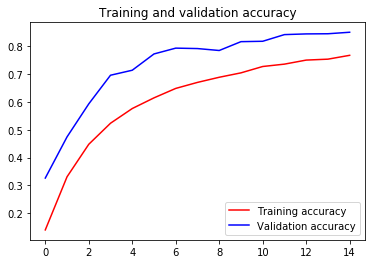

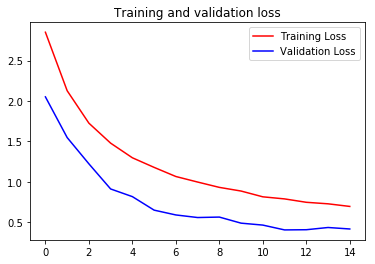

In [0]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history.get('acc')
val_acc = history.history.get('val_acc')
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()